##Business Understanding

# **Business Objective**


Tujuan utama proyek analisis ini adalah untuk mengetahui kehidupan sosial dan ekonomi masyarakat Indonesia pada tahun 2021. Hal ini meliputi wilayah apa yang memiliki persentase kemiskinan paling tinggi atau sebaliknya, angka harapan hidup dari setiap wilayah, dan hal-hal lainnya yang berhubungan dengan kehidupan sosial dan ekonomi masyrakat Indonesia. Selain itu, juga untuk mengetahui seberapa besar dampak pendidikan untuk perekenomian di Indonesia.

# **Assess Situation**

Situasi yang mendasari analisis ini untuk melihat apakah arah ekonomi dan sosial di Indonesia sudah benar atau tidak. Masih terdapat beberapa ketimpangan ekonomi yang terjadi di masa sekarang. Wilayah yang seharusnya mendapat perhatian lebih justru diabaikan.

# **Data Understanding**

Sumber data: https://www.kaggle.com/datasets/dannytheodore/socio-economic-of-indonesia-in-2021

In [6]:
import pandas as pd

df = pd.read_csv("/content/Data AVD Praktikum.csv")

df

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577
...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673


**Pemeriksaan Tipe Data**

In [7]:
df.dtypes

,0
province,object
cities_reg,object
poorpeople_percentage,float64
reg_gdp,float64
life_exp,float64
avg_schooltime,float64
exp_percap,int64


**Menampilkan berapa kolom dan baris**

In [8]:
df.shape

(514, 7)

**Statistik Deskriptif dari data (Mean,Median,Min,Max,Quartil)**

In [9]:
df.describe()

,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,12.273152,34.798333,69.619076,8.436615,10324.787938
std,7.458703,84.155498,3.455911,1.630842,2717.144186
min,2.380000,1.042000,55.370000,1.420000,3976.000000
25%,7.150000,5.587500,67.336250,7.510000,8574.000000
50%,10.455000,13.068500,69.922500,8.305000,10196.500000
75%,14.887500,28.849500,72.018750,9.337500,11719.000000
max,41.660000,819.000000,77.855000,12.830000,23888.000000


Dapat dilihat di bawah karena ini merupakan data mengenai wilayah-wilayah di Indonesia, jadi masing-masing memiliki value yang unik.

In [10]:
df.value_counts()


province          cities_reg         poorpeople_percentage  reg_gdp  life_exp  avg_schooltime  exp_percap
Aceh              Aceh Barat         18.81                  8.116    67.945    9.55            9593          1
Sulawesi Selatan  Kota Palopo        8.14                   8.025    70.865    10.94           13117         1
Papua Barat       Pegunungan Arfak   34.70                  218.000  67.260    5.12            5009          1
                  Maybrat            31.39                  732.000  65.240    6.96            5245          1
                  Manokwari Selatan  29.30                  819.000  67.600    6.63            5505          1
                                                                                                            ..
Jawa Timur        Pacitan            15.11                  15.785   72.030    7.61            8887          1
                  Ngawi              15.57                  20.271   72.355    7.26            11459         1
                  Nganjuk            11.85                  26.601   71.550    7.78            12172         1
                  Mojokerto          10.62                  81.941   72.535    8.64            12844         1
Sumatera Utara    Toba Samosir       8.99                   7.845    70.210    10.57           12224         1
Name: count, Length: 514, dtype: int64

**Mencari korelasi**

In [11]:
df.corr(numeric_only=True)

,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap
poorpeople_percentage,1.000000,-0.078131,-0.538820,-0.543909,-0.644222
reg_gdp,-0.078131,1.000000,0.209147,0.165403,0.333952
life_exp,-0.538820,0.209147,1.000000,0.414511,0.565775
avg_schooltime,-0.543909,0.165403,0.414511,1.000000,0.668847
exp_percap,-0.644222,0.333952,0.565775,0.668847,1.000000


Untuk korelasi positif yaitu terdapat di kolom rata-rata lama pendidikan dengan pengeluaran per kapita, hal ini bisa disimpulkan bahwa semakin lama penduduk melakukan pendidikan semakin tinggi juga pengeluaran per kapita-nya.

Sedangkan, untuk korelasi negatif terdapat di kolom persentase penduduk miskin dengan rata-rata lama pendidikan, dapat disimpulkan bahwa semakin lama penduduk melakukan pendidikan semakin rendah pula persentase penduduk miskinnya.

# **Data Preparation**

Sumber data: https://www.kaggle.com/datasets/dannytheodore/socio-economic-of-indonesia-in-2021

**Pengecheckan untuk data apakah ada missing values**

In [12]:
print((df.isna().sum() / len(df)) * 100)

province                 0.0
cities_reg               0.0
poorpeople_percentage    0.0
reg_gdp                  0.0
life_exp                 0.0
avg_schooltime           0.0
exp_percap               0.0
dtype: float64


Karna tidak ada missing values, jadi tidak ada yang perlu ditambahin dari datanya

**Mengecheck data duplikat**

In [13]:
df.duplicated().sum()


0

Hasilnya tidak ada data yang duplikat

**Outlier**

Jika ada outlier di dalam data saya itu tidak dihapus, karena nilai tersebut mewaikili fenomena nyata yaitu nilai yang telah dikumpulkan berdasarkan fakta.

**Inconsistent Values**

In [14]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 20)


Unique values in column 'province':
['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi'
 'Sumatera Selatan' 'Bengkulu' 'Lampung' 'Kepulauan Bangka Belitung'
 'Kepulauan Riau' 'DKI Jakarta' 'Jawa Barat' 'Jawa Tengah' 'DI Yogyakarta'
 'Jawa Timur' 'Banten' 'Bali' 'Nusa Tenggara Barat' 'Nusa Tenggara Timur'
 'Kalimantan Barat' 'Kalimantan Tengah' 'Kalimantan Selatan'
 'Kalimantan Timur' 'Kalimantan Utara' 'Sulawesi Utara' 'Sulawesi Tengah'
 'Sulawesi Selatan' 'Sulawesi Tenggara' 'Gorontalo' 'Sulawesi Barat'
 'Maluku' 'Maluku Utara' 'Papua Barat' 'Papua']
--------------------
Unique values in column 'cities_reg':
['Simeulue' 'Aceh Singkil' 'Aceh Selatan' 'Aceh Tenggara' 'Aceh Timur'
 'Aceh Tengah' 'Aceh Barat' 'Aceh Besar' 'Pidie' 'Bireuen' 'Aceh Utara'
 'Aceh Barat Daya' 'Gayo Lues' 'Aceh Tamiang' 'Nagan Raya' 'Aceh Jaya'
 'Bener Meriah' 'Pidie Jaya' 'Kota Banda Aceh' 'Kota Sabang' 'Kota Langsa'
 'Kota Lhokseumawe' 'Kota Subulussalam' 'Nias' 'Mandailing Natal'
 'Tapanuli Selatan' 'Ta

Karena data saya berisi Provinsi beserta Kabupaten/Kota yang berbeda-beda, jadi tidak ada yang perlu ditangani.

**Construct Data**

Berdasarkan korelasi yang telah ada, saya ingin menganalisis mengenai pengaruh pendidikan terhadap perekonomian di wilayah tersebut dan pengaruh pendidikan terhadap kemiskinan.

In [15]:
df["education_income_ratio"] = df["avg_schooltime"] / df["exp_percap"]
df["education_poverty_index"] = df["poorpeople_percentage"] / df["avg_schooltime"]

df

,province,cities_reg,poorpeople_percentage,reg_gdp,life_exp,avg_schooltime,exp_percap,education_income_ratio,education_poverty_index
0,Aceh,Simeulue,18.98,2.275,65.240,9.48,7148,0.001326,2.002110
1,Aceh,Aceh Singkil,20.36,2.425,67.355,8.68,8776,0.000989,2.345622
2,Aceh,Aceh Selatan,13.18,5.531,64.360,8.88,8180,0.001086,1.484234
3,Aceh,Aceh Tenggara,13.41,5.063,68.155,9.67,8030,0.001204,1.386763
4,Aceh,Aceh Timur,14.45,10.616,68.705,8.21,8577,0.000957,1.760049
...,...,...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,1.438,66.060,2.16,5412,0.000399,16.787037
510,Papua,Dogiyai,28.81,1.356,65.845,4.94,5415,0.000912,5.831984
511,Papua,Intan Jaya,41.66,1.274,65.580,3.09,5328,0.000580,13.482201
512,Papua,Deiyai,40.59,1.439,65.355,3.25,4673,0.000695,12.489231


**Data Reduction**

Karena kolom "life_exp", dan "reg_gdp" tidak berkaitan dengan analisis saya, saya akan menghapus kolom tersebut.

In [16]:
df = df.drop('life_exp', axis=1)
df = df.drop('reg_gdp', axis=1)

df

,province,cities_reg,poorpeople_percentage,avg_schooltime,exp_percap,education_income_ratio,education_poverty_index
0,Aceh,Simeulue,18.98,9.48,7148,0.001326,2.002110
1,Aceh,Aceh Singkil,20.36,8.68,8776,0.000989,2.345622
2,Aceh,Aceh Selatan,13.18,8.88,8180,0.001086,1.484234
3,Aceh,Aceh Tenggara,13.41,9.67,8030,0.001204,1.386763
4,Aceh,Aceh Timur,14.45,8.21,8577,0.000957,1.760049
...,...,...,...,...,...,...,...
509,Papua,Puncak,36.26,2.16,5412,0.000399,16.787037
510,Papua,Dogiyai,28.81,4.94,5415,0.000912,5.831984
511,Papua,Intan Jaya,41.66,3.09,5328,0.000580,13.482201
512,Papua,Deiyai,40.59,3.25,4673,0.000695,12.489231


# **Visualisasi Data**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Rata-Rata Education Income Ratio setiap Provinsi**

<ipython-input-37-a78bbd1b421f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_income_ratio_per_province.index, y=edu_income_ratio_per_province.values, palette="crest")


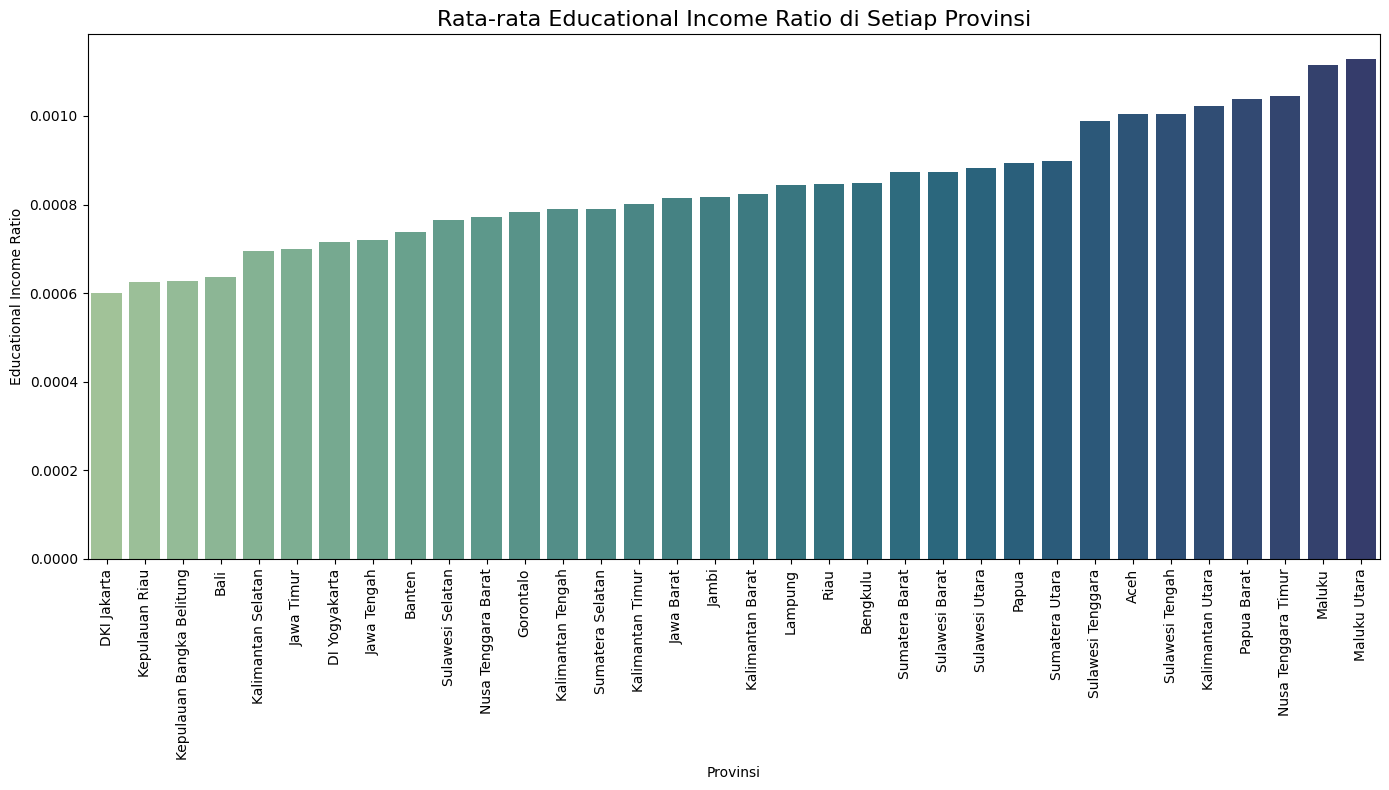

In [37]:
edu_income_ratio_per_province = df.groupby('province')['education_income_ratio'].mean().sort_values()

plt.figure(figsize=(14, 8))
sns.barplot(x=edu_income_ratio_per_province.index, y=edu_income_ratio_per_province.values, palette="crest")
plt.title('Rata-rata Education Income Ratio di Setiap Provinsi', fontsize=16)
plt.ylabel('Education Income Ratio')
plt.xlabel('Provinsi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Dapat dilihat dari Bar Chart di atas, bahwa pada wilayah Timur di Indonesia seperti Papua Barat, NTT, dan Maluku memiliki nilai rata-rata Education Income Ratio yang besar.**

**Yang berarti wilayah tersebut mengeluarkan biaya untuk pendidikan lebih dari wilayah lainnya. Di sini tindakan yang bisa diberikan dari pemerintah adalah dengan mengurangi atau meniadakan biaya untuk pendidikan di wilayah memiliki nilai EIR yang tinggi.**

## **Rata-Rata Education Poverty Index setiap Provinsi**

<ipython-input-38-66d6a9984110>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_poverty_index_per_province.index, y=edu_poverty_index_per_province.values, palette="crest")


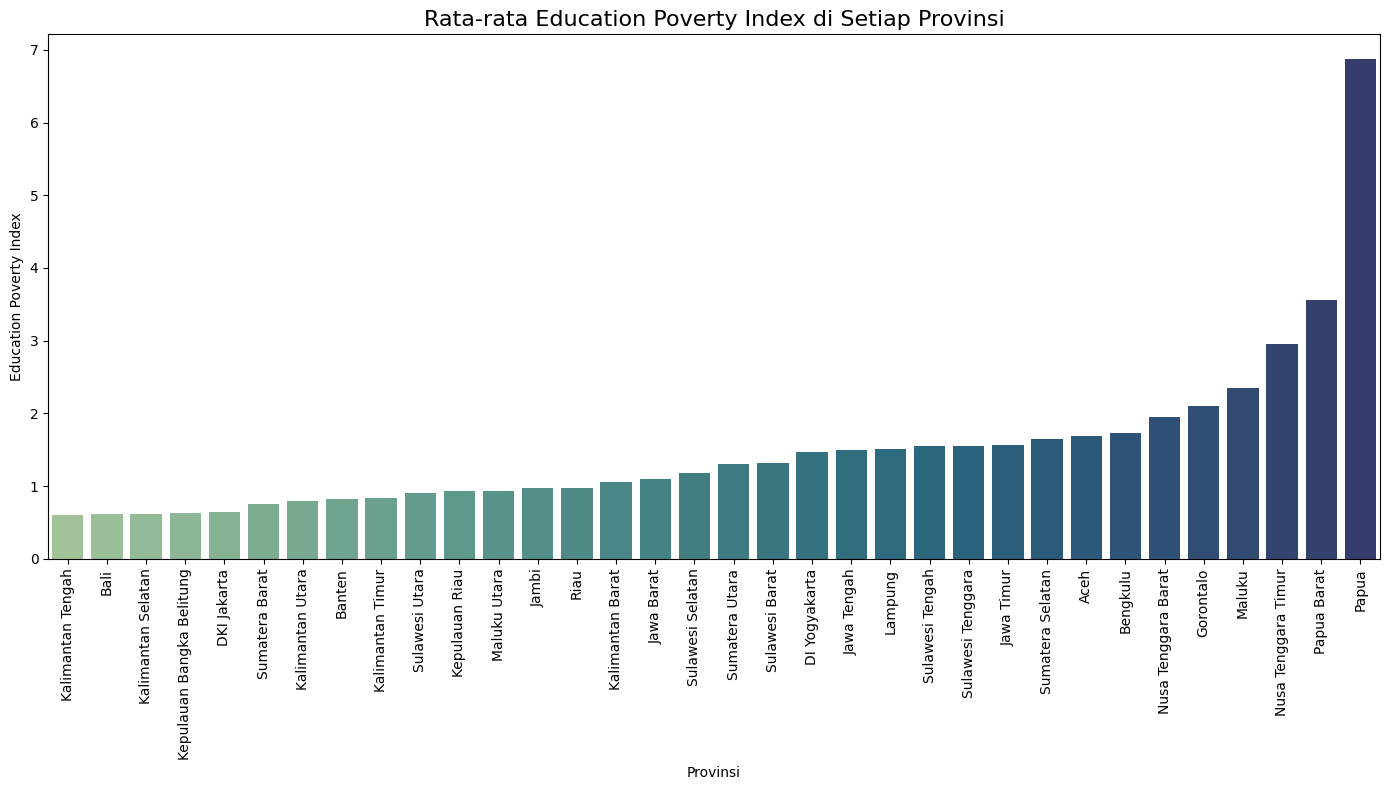

In [38]:
edu_poverty_index_per_province = df.groupby('province')['education_poverty_index'].mean().sort_values()

plt.figure(figsize=(14, 8))
sns.barplot(x=edu_poverty_index_per_province.index, y=edu_poverty_index_per_province.values, palette="crest")
plt.title('Rata-rata Education Poverty Index di Setiap Provinsi', fontsize=16)
plt.ylabel('Education Poverty Index')
plt.xlabel('Provinsi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Dapat dilihat dari Bar Chart di atas, bahwa pada wilayah Timur di Indonesia seperti Papua Barat, NTT, dan Maluku memiliki nilai rata-rata Education Poverty Index yang besar.**

**Yang berarti wilayah tersebut memiliki hubungan yang kuat antara rendahnya pendidikan dengan kemiskinan. Tindakan yang bisa di ambil dari pemerintah adalah dengan memfokuskan lagi mengenai pendidikan untuk wilayah tersebut dan menumbuhkan minat masyarakat pada wilayah tersebut untuk berpendidikan dengan memberikan beasiswa atau sejenisnya.**